In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="ticks")

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr
import matplotlib.font_manager as font_manager

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

#define plotter
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


In [2]:
#nltk.download()

In [3]:
data = pd.read_csv('realDonaldTrump_tweets.csv')
data.head()



,id,created_at,text,source
0,834384982495940613,2017-02-22 12:50:56,Very much enjoyed my tour of the Smithsonian's...,Twitter for Android
1,834377364947816448,2017-02-22 12:20:40,"One thing I will say about Rep. Keith Ellison,...",Twitter for Android
2,834181712783560705,2017-02-21 23:23:13,The so-called angry crowds in home districts o...,Twitter for Android
3,834142323881684993,2017-02-21 20:46:42,'Americans overwhelmingly oppose sanctuary cit...,Twitter for iPhone
4,833838311315763200,2017-02-21 00:38:40,Congratulations to our new National Security A...,Twitter for iPhone


In [4]:
data['count'] = 1

In [5]:
count_words = lambda x: len(x.split())

In [6]:
character_count = lambda x: len(x)

In [7]:
data['word_count'] = data['text'].apply(count_words)

In [8]:
data['character_count'] = data['text'].apply(character_count)

In [9]:
tokenize = lambda x: nltk.word_tokenize(x.decode('utf-8'))

In [10]:
data['tokens'] = data['text'].apply(tokenize)

In [11]:
sentence_count = lambda x: len(nltk.sent_tokenize(x.decode('utf-8')))

In [12]:
data['sentence_count'] = data['text'].apply(sentence_count)
data = data.reset_index()
data['created_at'] = pd.to_datetime(data.created_at)
data.tail()

,index,id,created_at,text,source,count,word_count,character_count,tokens,sentence_count
3195,3195,711520501856866304,2016-03-20 11:51:21,"""@GStephanopoulos: What’s @realDonaldTrump's s...",Twitter for Android,1,16,144,"[``, @, GStephanopoulos, :, What’s, @, realDon...",3
3196,3196,711418254556852224,2016-03-20 05:05:04,The rallies in Utah and Arizona were great! Tr...,Twitter for Android,1,20,116,"[The, rallies, in, Utah, and, Arizona, were, g...",3
3197,3197,711414965224259586,2016-03-20 04:51:59,"""@jojo2foxy: TRUMP IS NOT AFRAID OF ANYTHING O...",Twitter for Android,1,25,138,"[``, @, jojo2foxy, :, TRUMP, IS, NOT, AFRAID, ...",1
3198,3198,711388380668493824,2016-03-20 03:06:21,THANK YOU ARIZONA! Get out and #VoteTrump on T...,Twitter for iPhone,1,13,123,"[THANK, YOU, ARIZONA, !, Get, out, and, #, Vot...",3
3199,3199,711366483872522240,2016-03-20 01:39:20,"Thank you- Tucson, Arizona! A great afternoon ...",Twitter for iPhone,1,15,138,"[Thank, you-, Tucson, ,, Arizona, !, A, great,...",4


In [13]:
data.set_index(['created_at'], drop=True, inplace=True)
del data['index']
data.head()

,id,text,source,count,word_count,character_count,tokens,sentence_count
created_at,,,,,,,,
2017-02-22 12:50:56,834384982495940613,Very much enjoyed my tour of the Smithsonian's...,Twitter for Android,1,22,140,"[Very, much, enjoyed, my, tour, of, the, Smith...",1
2017-02-22 12:20:40,834377364947816448,"One thing I will say about Rep. Keith Ellison,...",Twitter for Android,1,29,137,"[One, thing, I, will, say, about, Rep., Keith,...",1
2017-02-21 23:23:13,834181712783560705,The so-called angry crowds in home districts o...,Twitter for Android,1,21,136,"[The, so-called, angry, crowds, in, home, dist...",2
2017-02-21 20:46:42,834142323881684993,'Americans overwhelmingly oppose sanctuary cit...,Twitter for iPhone,1,6,74,"['Americans, overwhelmingly, oppose, sanctuary...",1
2017-02-21 00:38:40,833838311315763200,Congratulations to our new National Security A...,Twitter for iPhone,1,13,131,"[Congratulations, to, our, new, National, Secu...",3


In [37]:
#data.groupby(pd.TimeGrouper(freq='30Min'))
#data.groupby(['created_at'])['count'].sum()
xx_Android = data[data.source == 'Twitter for Android'].groupby(pd.TimeGrouper(freq='10Min'))['count', 'character_count'].sum()
xx_iPhone = data[data.source == 'Twitter for iPhone'].groupby(pd.TimeGrouper(freq='10Min'))['count', 'character_count'].sum()

xx_Android.head()

,count,character_count
created_at,,
2016-03-20 04:50:00,1.0,138.0
2016-03-20 05:00:00,1.0,116.0
2016-03-20 05:10:00,NaN,NaN
2016-03-20 05:20:00,NaN,NaN
2016-03-20 05:30:00,NaN,NaN


In [38]:
#grp = xx.groupby(by=[xx.index.map(lambda x : (x.hour, x.minute))]).sum()
grp = xx_Android.groupby(by=[xx_Android.index.map(lambda x : '{0:02}:{1:02}'.format(x.hour, x.minute))]).sum()
grp=grp.reset_index()
grp = grp.rename(columns={'index': 'TOD'}) #TOD means time of da


grp_i = xx_iPhone.groupby(by=[xx_iPhone.index.map(lambda x : '{0:02}:{1:02}'.format(x.hour, x.minute))]).sum()
grp_i=grp_i.reset_index()
grp_i = grp_i.rename(columns={'index': 'TOD'}) #TOD means time of da


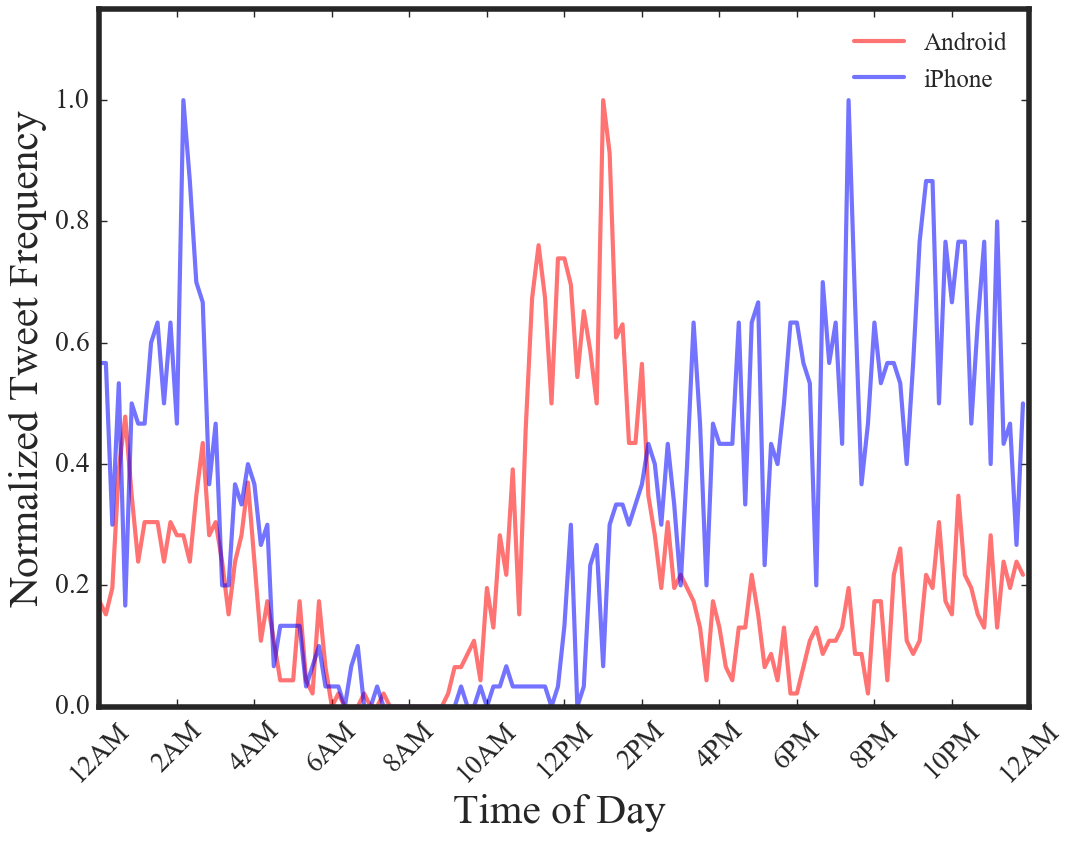

In [51]:
## The is Trump's average TWITTER activity from March 17, 2016 through Feb 19, 2017
#plt.xticks(range(0, len(grp)+12, 12), ['{0:02}:00'.format(i) for i in range(0, 26, 2)], rotation='vertical');

grp = grp.fillna(0)
grp_i = grp_i.fillna(0)
plt.plot(grp.index.tolist(), grp['count']/max(grp['count']), color='red', 
         label='Android', linewidth=3, alpha=0.55)
plt.plot(grp_i.index.tolist(), grp_i['count']/max(grp_i['count']), color='blue', 
         label='iPhone', linewidth=3, alpha=0.55)

plt.xlabel('Time of Day ', fontsize =  30)
plt.ylabel('Normalized Tweet Frequency', fontsize =  30)
plt.xticks(range(0, len(grp)+12, 12), ['12AM', '2AM', '4AM', '6AM', '8AM', \
                                       '10AM', '12PM', '2PM', '4PM', '6PM', '8PM', \
                                       '10PM', '12AM'], rotation=45);
plt.xlim(0,len(grp['count']))
plt.ylim(0, 1.15)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

#matplotlib.rc('xtick', labelsize=14) 
#matplotlib.rc('ytick', labelsize=14) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=18)
#annotate
#plt.annotate("Bedtime?", xy=(14, 1.00), xycoords='data',\
#             xytext=(32, 1.08), textcoords='data',\
#             size=30, va="center", ha="center", \
#             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.2"))
#
#plt.annotate("Lunch?", xy=(80, 1.00), xycoords='data',\
#             xytext=(95, 1.08), textcoords='data',\
#             size=30, va="center", ha="center", \
#             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.2"))
#
#plt.annotate("Coffee?", xy=(100, 0.65), xycoords='data',\
#             xytext=(95, 0.80), textcoords='data',\
#             size=30, va="center", ha="center", \
#             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.2"))
#
#
#plt.annotate("Dinner?", xy=(116, 0.73), xycoords='data',\
#             xytext=(125, 0.90), textcoords='data',\
#             size=30, va="center", ha="center", \
#             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=+0.4"))


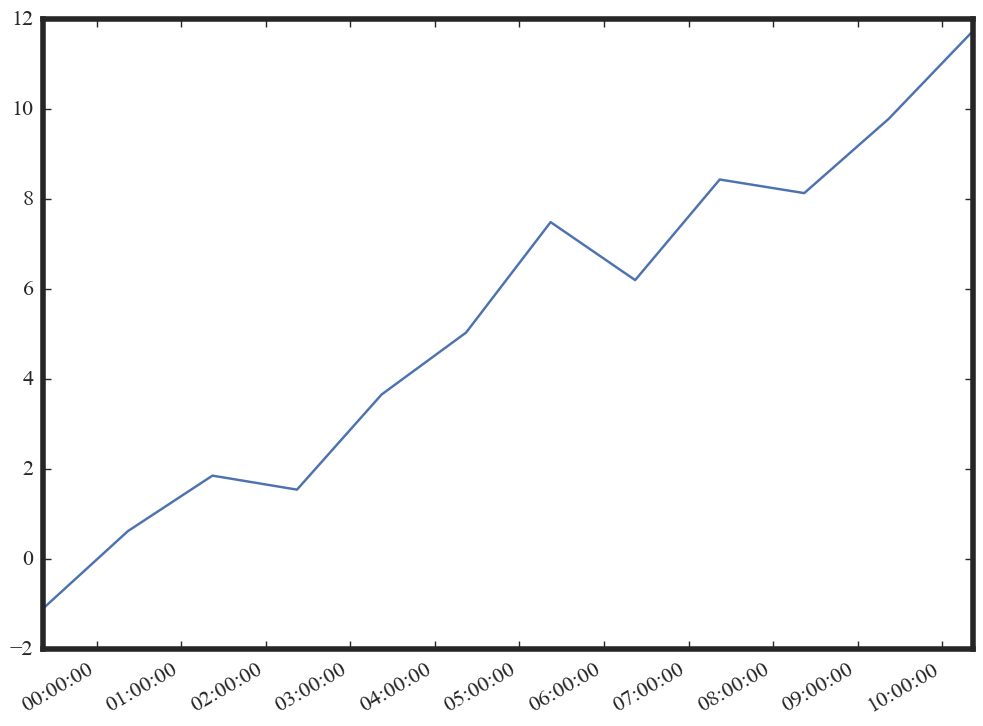

TypeError: Required argument 'year' (pos 1) not found

In [36]:
import datetime
import random

# make up some data
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12)]
y = [i+random.gauss(0,1) for i,_ in enumerate(x)]

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()


In [18]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [19]:
data['created_at'].dtype

dtype('<M8[ns]')

In [106]:
stop_words = list(set(stopwords.words('english')))

In [51]:
FreqDist(nltk.word_tokenize("My statement as to what's happening in Sweden"))

Counter({"'s": 1,
         'My': 1,
         'Sweden': 1,
         'as': 1,
         'happening': 1,
         'in': 1,
         'statement': 1,
         'to': 1,
         'what': 1})

In [53]:
tokens = data['tokens'].values

In [59]:
words = sum(tokens, [])

In [60]:
lowercase_words = [i.lower() for i in words]

In [197]:
junkish = ['.', ':', '!', "'", '@', 'https', '#', '"', ',', '``', "''", '-', ';', '&', 'amp', "n't", "'s", '?', 'rt',
          '(',')', '%', '...', '--', 'co', 'clinton', 'realdonaldtrump','trump2016']

In [198]:
filtered_words = [word for word in lowercase_words if word not in junkish+stop_words]

In [199]:
fdist = FreqDist(filtered_words)

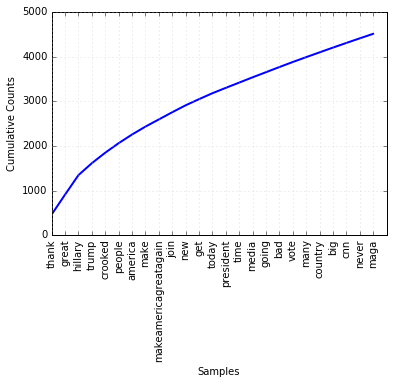

In [200]:
fdist.plot(25, cumulative=True)

In [201]:
fdist.most_common(100)

[(u'thank', 465),
 (u'great', 445),
 (u'hillary', 436),
 (u'trump', 267),
 (u'crooked', 235),
 (u'people', 213),
 (u'america', 194),
 (u'make', 177),
 (u'makeamericagreatagain', 161),
 (u'join', 161),
 (u'new', 155),
 (u'get', 138),
 (u'today', 133),
 (u'president', 120),
 (u'time', 118),
 (u'media', 118),
 (u'going', 115),
 (u'bad', 115),
 (u'vote', 113),
 (u'many', 109),
 (u'country', 107),
 (u'big', 107),
 (u'cnn', 104),
 (u'never', 103),
 (u'maga', 101),
 (u'would', 99),
 (u'jobs', 98),
 (u'back', 98),
 (u'one', 91),
 (u'tonight', 91),
 (u'obama', 88),
 (u'said', 86),
 (u'like', 86),
 (u'tomorrow', 83),
 (u'debate', 80),
 (u'watch', 79),
 (u'draintheswamp', 77),
 (u'americafirst', 77),
 (u'win', 77),
 (u'us', 75),
 (u'enjoy', 75),
 (u'speech', 73),
 (u'\u2026', 73),
 (u'bernie', 71),
 (u'last', 71),
 (u'see', 70),
 (u'u.s.', 70),
 (u'support', 69),
 (u'much', 67),
 (u'nytimes', 67),
 (u'ohio', 66),
 (u'good', 65),
 (u'news', 65),
 (u'job', 65),
 (u'want', 64),
 (u'american', 64),
 

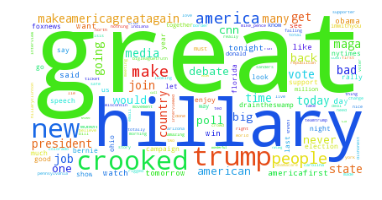

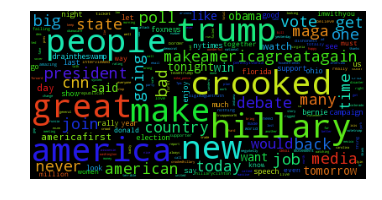

In [212]:
from wordcloud import WordCloud

text = '\t'.join(filtered_words)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=['co', 'thank'], background_color='white', max_words=2000).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, stopwords=['co', 'thank']).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()